<h2>Machine Learning: Determining Risk of Suicide From Nocturnal Sleep Behavior</h2>
<h4>Team: Natalie Fung, Maya Ramde, & Ellyse Robert</h4>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load the data
data = pd.read_excel('sleep_full_data.xlsx', index_col = [0])

In [3]:
# Get frequency count of the suicide risks
print(data['Risk of Suicide'].value_counts())

0    769
1    202
Name: Risk of Suicide, dtype: int64


In [4]:
print("Columns of full data set:", data.columns)
print('Number of rows:', data.shape[0])
print('Number of columns:', data.shape[1])

Columns of full data set: Index(['Age', 'Sex', 'Race', 'Sleep Control Score', 'Nightmare Severity Score',
       'Global Sleep Quality Score', 'Subjective Sleep Quality Score',
       'Sleep Latency', 'Sleep Duration', 'Sleep Efficiency',
       'Sleep Disturbance', 'Use of Sleep Meds', 'Daytime Dysfunction',
       'Excessive Daytime Sleepiness', 'Fatigue',
       'REM Sleep Behavior Disorder', 'Sleep-related TMJ',
       'Average Sleep Duration', '# of Mid-night Awakenings', 'Cannabis Use',
       'Tobacco Use', 'Alcohol Use', 'Risk of Suicide'],
      dtype='object')
Number of rows: 971
Number of columns: 23


<h3>Preliminary Analsyis: Examine relationships between demographic variables and sleep input variables </h3>

In [5]:
#Look at suicide risk RATE by sex and cannabis use
print(data.pivot_table('Risk of Suicide', index='Sex', columns='Cannabis Use'))

Cannabis Use     Never     Often    Rarely
Sex                                       
Female        0.184644  0.376623  0.325843
Male          0.155779  0.187500  0.222222


In [6]:
#Look at suicide risk COUNTS by sex and cannabis use
print(data.pivot_table('Risk of Suicide', index='Sex', columns='Cannabis Use', aggfunc = 'count'))

Cannabis Use  Never  Often  Rarely
Sex                               
Female          547     77      89
Male            199     32      27


In [7]:
#Look at suicide risk RATE by tobacco use
print(data.pivot_table('Risk of Suicide', columns='Tobacco Use'))

Tobacco Use         Never     Often    Rarely
Risk of Suicide  0.194805  0.368421  0.238806


In [8]:
#Look at suicide risk COUNTS by tobacco use
print(data.pivot_table('Risk of Suicide', columns='Tobacco Use', aggfunc = 'count'))

Tobacco Use      Never  Often  Rarely
Risk of Suicide    847     57      67


In [9]:
#Look at suicide risk RATE by alcohol use
print(data.pivot_table('Risk of Suicide', columns='Alcohol Use'))

Alcohol Use         Never     Often    Rarely
Risk of Suicide  0.195429  0.428571  0.304878


In [10]:
#Look at suicide risk COUNTS by alcohol use
print(data.pivot_table('Risk of Suicide', columns='Alcohol Use', aggfunc = 'count'))

Alcohol Use      Never  Often  Rarely
Risk of Suicide    875     14      82


<h3>Visualize the count of suicide risks for categorical variables</h3>

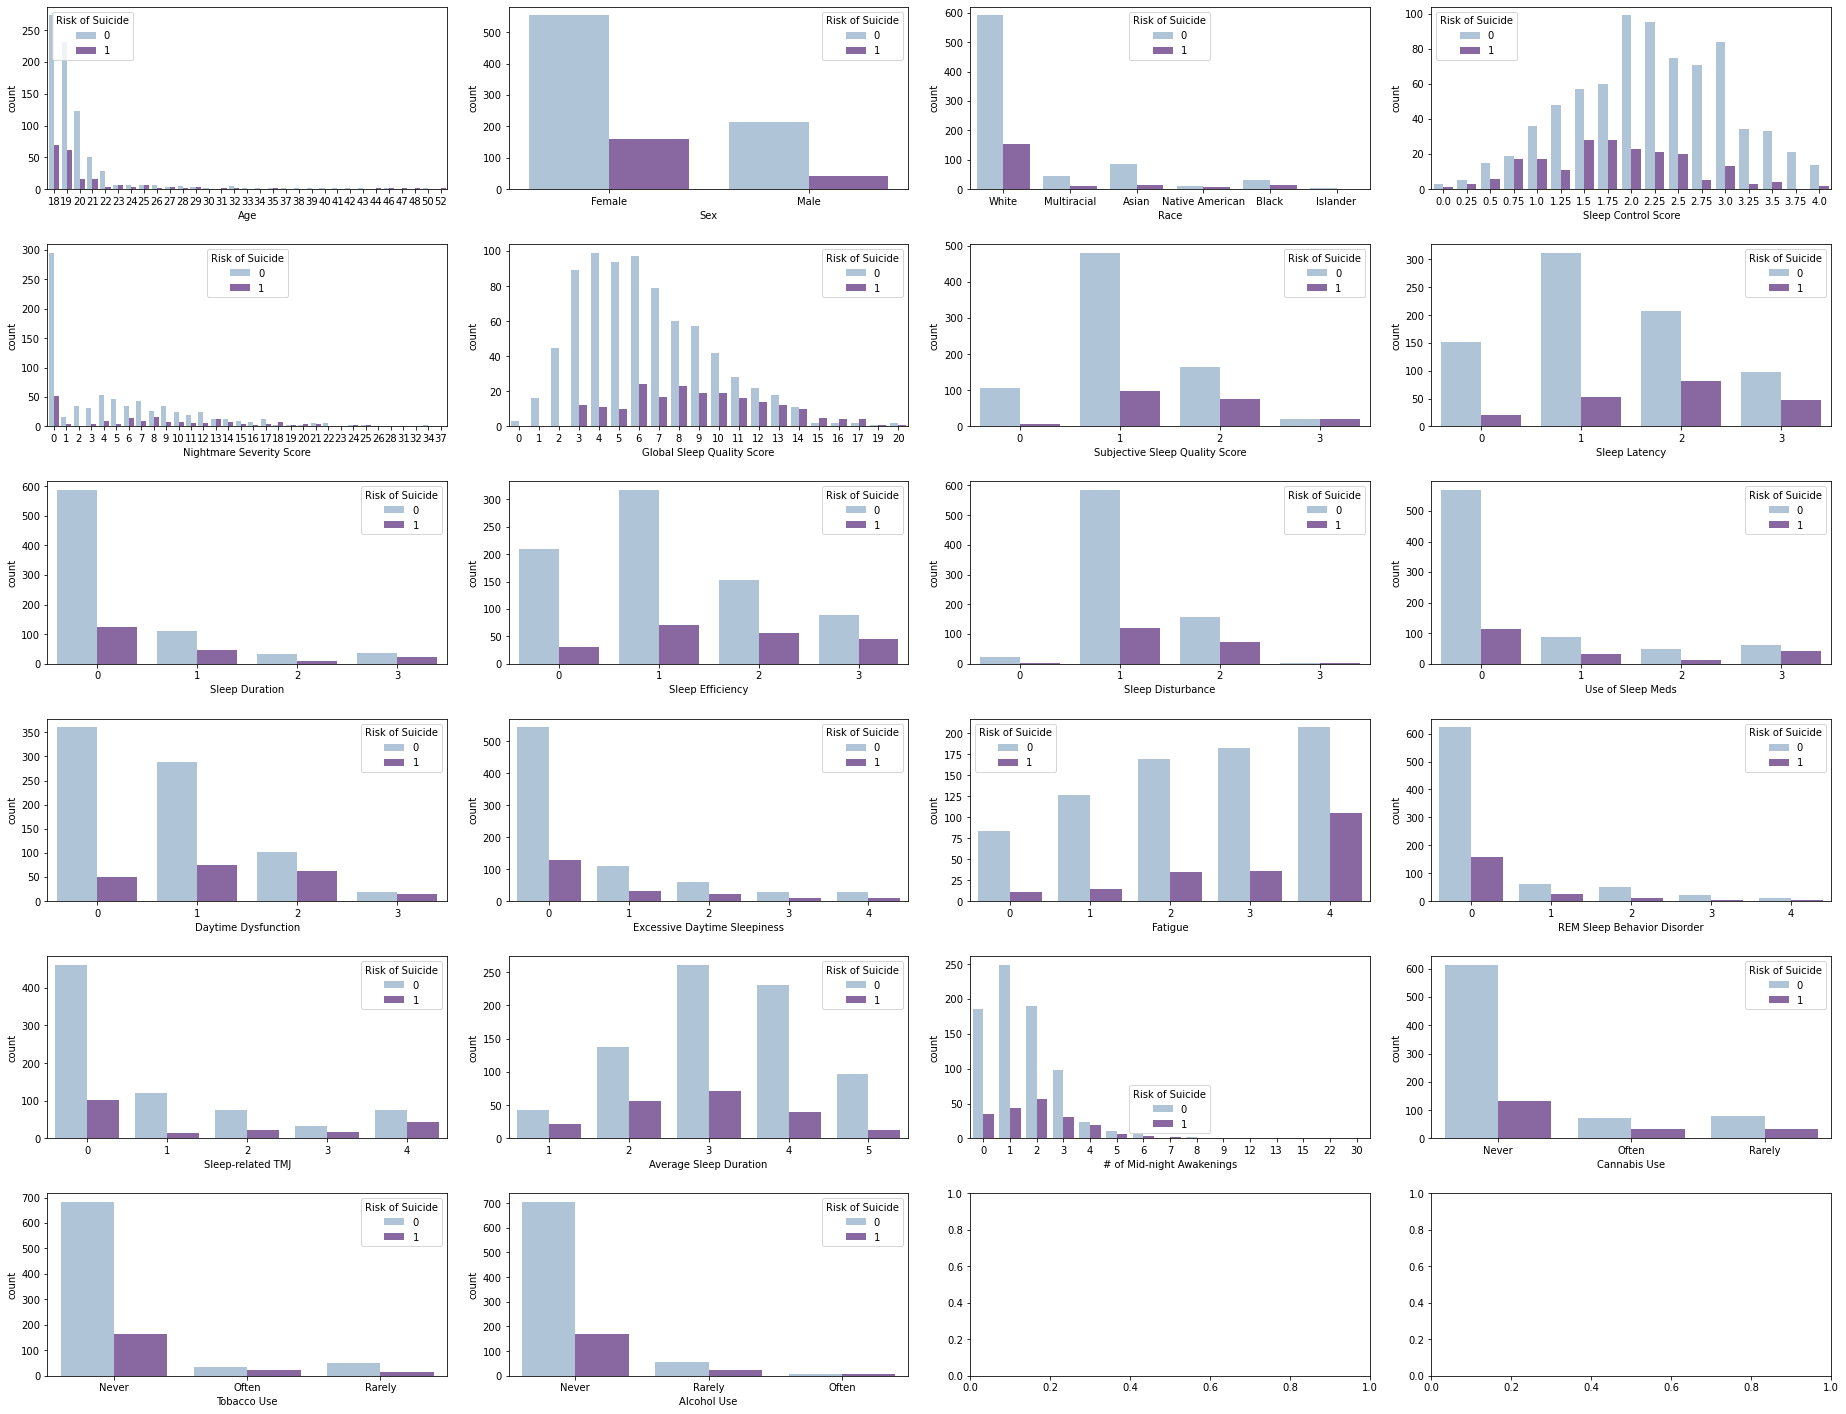

In [11]:
fig1 , ax = plt.subplots(6, 4, figsize = (40, 30))     
fig1.set_figheight(20)
fig1.set_figwidth(26)
for i, subplots in zip(data.iloc[:,:22], ax.flatten()):  
    sns.countplot(data[i],hue = data['Risk of Suicide'],ax = subplots, palette = 'BuPu') 
fig1.tight_layout(pad=2.0)
fig1.savefig("countplots_by_variable.png", dpi=800)
plt.show()

It is important to take note of input variables with skewed frequency distributions as this will cause the data set to be imbalanced and impact model accuracy. We observe that Age, Sex, Race, Sleep Duration, Use of Sleep Meds, Daytime Dysfunction, Excessive Daytime Sleepiness, REM Sleep Behavior Disorder, Sleep-related TMJ, Cannabis Use, Tobacco Use, and Alcohol Use are imbalanced variables. We also observe that our output variable is also imbalanced, but that is expected in this study and we will still aim to construct an accurate model.

In [12]:
# Drop imbalanced input variables
data = data.drop(['Age', 'Sex', 'Race', 'Sleep Duration', 'Use of Sleep Meds', 'Daytime Dysfunction',
                  'Excessive Daytime Sleepiness', 'REM Sleep Behavior Disorder', 'Sleep-related TMJ',
                  'Tobacco Use', 'Alcohol Use', 'Cannabis Use'], axis=1)

<h3>Find suicide risk rate for values of input variables</h3>

In [13]:
for col in data.columns:
    print(data.groupby(col)[['Risk of Suicide']].mean(), '\n')

                     Risk of Suicide
Sleep Control Score                 
0.00                        0.250000
0.25                        0.375000
0.50                        0.285714
0.75                        0.472222
1.00                        0.320755
1.25                        0.186441
1.50                        0.329412
1.75                        0.318182
2.00                        0.188525
2.25                        0.181034
2.50                        0.210526
2.75                        0.065789
3.00                        0.134021
3.25                        0.081081
3.50                        0.108108
3.75                        0.000000
4.00                        0.125000 

                          Risk of Suicide
Nightmare Severity Score                 
0                                0.147399
1                                0.238095
2                                0.027778
3                                0.138889
4                                0.142857
5

<h3>Construct correlation matrix</h3>

In [14]:
# Correlation Matrix
print("CORRELATION MATRIX")
print(data[data.columns[1:]].corr()['Risk of Suicide'][:-1])

CORRELATION MATRIX
Nightmare Severity Score          0.207307
Global Sleep Quality Score        0.307037
Subjective Sleep Quality Score    0.248845
Sleep Latency                     0.193835
Sleep Efficiency                  0.173179
Sleep Disturbance                 0.150848
Fatigue                           0.195490
Average Sleep Duration           -0.163126
# of Mid-night Awakenings         0.130307
Name: Risk of Suicide, dtype: float64


Drop columns with low correlation: # of Mid-night Awakenings, Sleep Disturbance

In [15]:
data2 = data.drop(['# of Mid-night Awakenings', 'Sleep Disturbance'], axis=1)

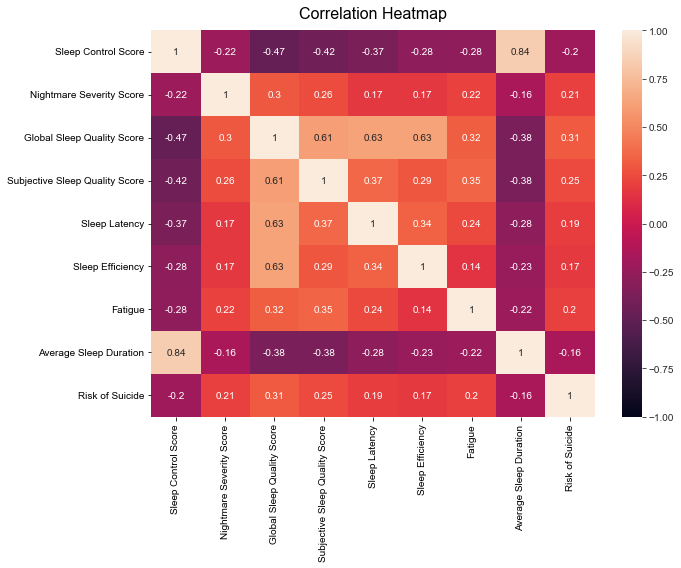

In [16]:
# Construct correlation heatmap with final input variables
fig,ax = plt.subplots(figsize=(10,8))
sns.set_style('white')
ax = sns.heatmap(data2.corr(), vmin=-1, vmax=1, annot=True)
ax.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12)
fig_heatmap = plt.gcf()
plt.tight_layout()
plt.show()
fig_heatmap.savefig("heatmap.png", dpi=800)

<h3>Visualize final input variables</h3><br>Plot histogrmas for categorical variables and density distributions for continuous variables

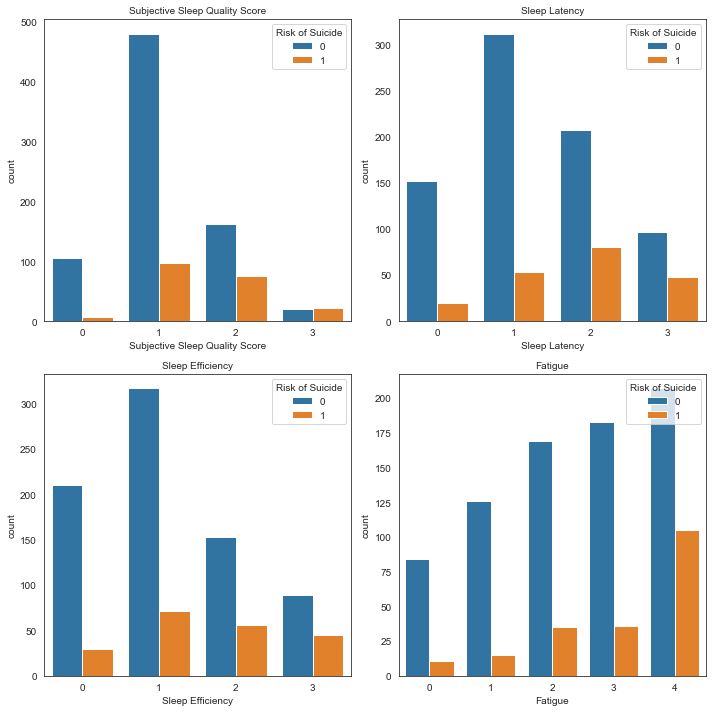

In [17]:
cols = ['Subjective Sleep Quality Score', 'Sleep Latency', 'Sleep Efficiency','Fatigue','Average Sleep Duration']

n_rows = 2
n_cols = 2

# The subplot grid and the figure size of each graph
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*5,n_rows*5))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(data2[cols[i]], hue=data2["Risk of Suicide"], ax=ax)
        ax.set_title(cols[i], fontsize = 10)
        ax.legend(title="Risk of Suicide", loc='upper right') 
fig.tight_layout()  
plt.show()  
fig.savefig("prelim_barplots.png", dpi=500)

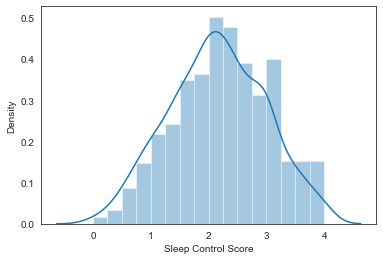

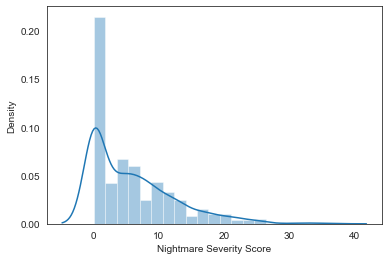

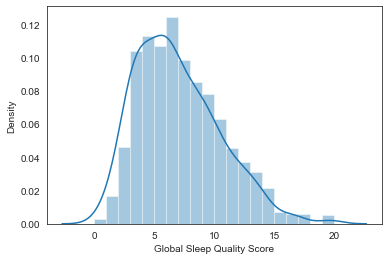

In [18]:
continuous_numeric_features = ['Sleep Control Score', 'Nightmare Severity Score', 
                               'Global Sleep Quality Score']
fig3,ax = plt.subplots()
for feature in continuous_numeric_features:
    ax = sns.distplot(data2[feature])
    plt.show()
fig3.savefig("density_dist_numeric_variables.png", dpi=500)

<h3> Import training data & create ML models </h3>

In [19]:
# Split data set into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data2.iloc[:,0:8].values, 
                                                    data2.iloc[:,8].values , 
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [20]:
# Scale the training data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [21]:
#Create a function 6 Machine Learning Models that outputs models' training accuracy
def models(X_train,Y_train):
  
    # Logistic Regression Algorithm 
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)

    # K-Nearest Neighbor algorithm
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)

    # Linear SVM Algorithm
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)

    # Kernel SVM Algorithm
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)

    # Naïve Bayes Algorithm
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)

    # Decision Tree Algorithm
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)

    # Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)

    # Calculate models' training accuracy
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
    print('[2]Support Vector Machine (Linear) Training Accuracy:', svc_lin.score(X_train, Y_train))
    print('[3]Support Vector Machine (RBF) Training Accuracy:', svc_rbf.score(X_train, Y_train))
    print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))

    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [22]:
# Store and train all of the models
model_v1 = models(x_train,y_train)
model_v1

[0]Logistic Regression Training Accuracy: 0.8157216494845361
[1]K Nearest Neighbor Training Accuracy: 0.8337628865979382
[2]Support Vector Machine (Linear) Training Accuracy: 0.8041237113402062
[3]Support Vector Machine (RBF) Training Accuracy: 0.8234536082474226
[4]Gaussian Naive Bayes Training Accuracy: 0.7603092783505154
[5]Decision Tree Classifier Training Accuracy: 0.9987113402061856
[6]Random Forest Classifier Training Accuracy: 0.9819587628865979


(LogisticRegression(random_state=0),
 KNeighborsClassifier(),
 SVC(kernel='linear', random_state=0),
 SVC(random_state=0),
 GaussianNB(),
 DecisionTreeClassifier(criterion='entropy', random_state=0),
 RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0))

<h3>Cross Validation</h3>

In [27]:
# 5-fold cross validation technique to calculate F1 score, average precision, and ROC/AUC score
def cross_validation(model, x_valid, y_valid):
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import confusion_matrix 
    for i in range(len(model)):
        print('Model[{}] F1 Scores = {}'.format(i, (cross_val_score(model[i], x_valid, y_valid, scoring='f1', cv=5))))
        print('Model[{}] Average F1 Score = {}'.format(i, np.round((cross_val_score(model[i], x_valid, y_valid, scoring='f1', cv=5)).mean(), 3)))
        
        print('Model[{}] Precision = {}'.format(i, (cross_val_score(model[i], x_valid, y_valid, scoring = 'average_precision', cv=5))))
        print('Model[{}] Average Precision = {}'.format(i, np.round((cross_val_score(model[i], x_valid, y_valid, scoring = 'average_precision', cv=5)).mean(), 3)))
        
        #print('Model[{}] ROC AUC = {}'.format(i, (cross_val_score(model[i], x_valid, y_valid, scoring = 'roc_auc', cv=5))))
       # print('Model[{}] Average ROC AUC = {}'.format(i, np.round((cross_val_score(model[i], x_valid, y_valid, scoring = 'roc_auc', cv=5)).mean(), 3)))
        
        print()

In [28]:
cross_validation(model_v1, x_test, y_test)

Model[0] F1 Scores = [0.5        0.35294118 0.25       0.35294118 0.18181818]
Model[0] Average F1 Score = 0.328
Model[0] Precision = [0.59048052 0.49777092 0.49308669 0.41763833 0.32230004]
Model[0] Average Precision = 0.464

Model[1] F1 Scores = [0.16666667 0.42857143 0.11764706 0.13333333 0.        ]
Model[1] Average F1 Score = 0.169
Model[1] Precision = [0.41239316 0.51987179 0.31541392 0.23794872 0.25543346]
Model[1] Average Precision = 0.348

Model[2] F1 Scores = [0.         0.         0.18181818 0.         0.18181818]
Model[2] Average F1 Score = 0.073
Model[2] Precision = [0.4517005  0.48800061 0.43977565 0.40526224 0.30355802]
Model[2] Average Precision = 0.418

Model[3] F1 Scores = [0.         0.16666667 0.16666667 0.         0.        ]
Model[3] Average F1 Score = 0.067
Model[3] Precision = [0.56276608 0.45468618 0.45477969 0.44068826 0.44060543]
Model[3] Average Precision = 0.471

Model[4] F1 Scores = [0.63157895 0.4        0.5        0.56       0.25      ]
Model[4] Average F

<h3>Test Model</h3>

In [25]:
# Create confusion matrices for each model and test for model accuracy
def test_model(model, x_test, y_test):
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import confusion_matrix 
    for i in range(len(model)):
        cm = confusion_matrix(y_test, model[i].predict(x_test)) 
        TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(x_test)).ravel()
        print(cm)
        print('Model[{}] Testing Accuracy = {}'.format(i, (TP + TN) / (TP + TN + FN + FP)))
        print()

In [26]:
test_model(model_v1, x_test, y_test)

[[141   4]
 [ 41   9]]
Model[0] Testing Accuracy = 0.7692307692307693

[[133  12]
 [ 42   8]]
Model[1] Testing Accuracy = 0.7230769230769231

[[145   0]
 [ 50   0]]
Model[2] Testing Accuracy = 0.7435897435897436

[[137   8]
 [ 44   6]]
Model[3] Testing Accuracy = 0.7333333333333333

[[117  28]
 [ 25  25]]
Model[4] Testing Accuracy = 0.7282051282051282

[[117  28]
 [ 33  17]]
Model[5] Testing Accuracy = 0.6871794871794872

[[133  12]
 [ 42   8]]
Model[6] Testing Accuracy = 0.7230769230769231



<h3>Though the Decision Tree Classifer had 100% training accuracy, it overfit the training data and had the lowest testing accuracy. However, the Naive Bayes classifer had both good training and testing scores. We also wanted to factor in the F1 score since original dataset was imbalanced and data for our output variable is imbalanced. </h3>

In [210]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss_model = gauss.fit(x_train, y_train)
y_pred = gauss_model.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       145
           1       0.47      0.50      0.49        50

    accuracy                           0.73       195
   macro avg       0.65      0.65      0.65       195
weighted avg       0.73      0.73      0.73       195



In [292]:
print('Probability of each class')
print('Risk of Suicide = 0: %.3f' % gauss.class_prior_[0])
print('Risk of Suicide = 1: %.3f' % gauss.class_prior_[1])

Probability of each class
Risk of Suicide = 0: 0.804
Risk of Suicide = 1: 0.196
